In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import PIL
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
ROOT_DIR = "/content/drive/MyDrive/Colab Notebooks/MyDataset/"

train_dir = ROOT_DIR + "Train/"

In [ ]:
BATCH_SIZE = 32
IMG_SHAPE  = 256

In [ ]:
train_data_gen = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    color_mode='rgb',
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMG_SHAPE,IMG_SHAPE),
    validation_split=0.2,
    seed=123,
    subset="training"
)

val_data_gen = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    color_mode='rgb',
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMG_SHAPE,IMG_SHAPE),
    validation_split=0.2,
    seed=123,
    subset="validation"
)

Found 5000 files belonging to 5 classes.
Using 4000 files for training.
Found 5000 files belonging to 5 classes.
Using 1000 files for validation.


In [ ]:
class_names = train_data_gen.class_names
print(class_names)

['fear', 'happiness', 'love', 'sadness', 'violence']


In [ ]:
for image_batch, labels_batch in train_data_gen:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32, 5)


In [ ]:
data_augmentation = keras.Sequential(
  [
      
    layers.RandomFlip("horizontal",
                      input_shape=(IMG_SHAPE,
                                  IMG_SHAPE,
                                  3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
  ]
)

In [ ]:
# Defining the VGG16

conv_base = tf.keras.applications.Xception(weights = 'imagenet',
                include_top = False,
                input_shape = (256, 256, 3))

In [ ]:
#Freezing the convolution base
conv_base.trainable = False

In [ ]:
'''# Enabling only the block 5
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'conv5_block3_3_conv (Conv2D)':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False'''

"# Enabling only the block 5\nconv_base.trainable = True\nset_trainable = False\nfor layer in conv_base.layers:\n  if layer.name == 'conv5_block3_3_conv (Conv2D)':\n    set_trainable = True\n  if set_trainable:\n    layer.trainable = True\n  else:\n    layer.trainable = False"

In [ ]:
#Network architecture
model = tf.keras.models.Sequential([
    layers.Rescaling(1./255, input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    data_augmentation,
    conv_base,
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer = 'l2'),
    layers.Dense(5, activation = 'softmax')
])

In [ ]:
# Summary of the model
conv_base.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 127, 127, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 127, 127, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [ ]:
'''# Enabling only the block 5
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False'''

"# Enabling only the block 5\nconv_base.trainable = True\nset_trainable = False\nfor layer in conv_base.layers:\n  if layer.name == 'block5_conv1':\n    set_trainable = True\n  if set_trainable:\n    layer.trainable = True\n  else:\n    layer.trainable = False"

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 flatten_1 (Flatten)         (None, 131072)            0         
                                                                 
 dense_2 (Dense)             (None, 512)               67109376  
                                                                 
 dense_3 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 87,973,421
Trainable params: 67,111,941


In [ ]:
#try with rmsprop with and without learning rate
#Try optimiser as rmsprop and adam
model.compile(tf.keras.optimizers.SGD(
    learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
'''
from pathlib import Path
import imghdr

data_dir = "/content/drive/MyDrive/MyDataset/Train/sadness"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
'''

'\nfrom pathlib import Path\nimport imghdr\n\ndata_dir = "/content/drive/MyDrive/MyDataset/Train/sadness"\nimage_extensions = [".png", ".jpg"]  # add there all your images file extensions\n\nimg_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]\nfor filepath in Path(data_dir).rglob("*"):\n    if filepath.suffix.lower() in image_extensions:\n        img_type = imghdr.what(filepath)\n        if img_type is None:\n            print(f"{filepath} is an image")\n        elif img_type not in img_type_accepted_by_tf:\n            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")\n'

In [ ]:
EPOCHS = 10
#3
history = model.fit(
    train_data_gen,
    epochs=EPOCHS,
    validation_data=val_data_gen)

Epoch 1/10
125/125 [==============================] - 68s 518ms/step - loss: 10.3154 - accuracy: 0.7697 - val_loss: 10.4607 - val_accuracy: 0.7090
Epoch 2/10
125/125 [==============================] - 69s 526ms/step - loss: 10.2341 - accuracy: 0.7765 - val_loss: 10.4606 - val_accuracy: 0.6970
Epoch 3/10
125/125 [==============================] - 67s 517ms/step - loss: 10.1856 - accuracy: 0.7788 - val_loss: 10.3434 - val_accuracy: 0.7110
Epoch 4/10
125/125 [==============================] - 68s 519ms/step - loss: 10.1219 - accuracy: 0.7928 - val_loss: 10.3042 - val_accuracy: 0.7190
Epoch 5/10
125/125 [==============================] - 68s 522ms/step - loss: 10.0591 - accuracy: 0.7925 - val_loss: 10.3083 - val_accuracy: 0.7010
Epoch 6/10
125/125 [==============================] - 67s 511ms/step - loss: 10.0075 - accuracy: 0.8027 - val_loss: 10.2331 - val_accuracy: 0.7210
Epoch 7/10
125/125 [==============================] - 68s 521ms/step - loss: 9.9406 - accuracy: 0.8112 - val_loss: 10.

In [ ]:
#model.save('xceptionmodel.h5')

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('/content/drive/MyDrive/model/xceptionmodel (1).h5')

In [ ]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 512)               67109376  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                

In [ ]:
test_dir = ("/content/drive/MyDrive/Colab Notebooks/MyDataset/Test")

In [ ]:
test_data_gen = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    color_mode='rgb',
    label_mode='categorical',
    batch_size=5,
    image_size=(IMG_SHAPE,IMG_SHAPE),
    seed=123
)

Found 100 files belonging to 5 classes.


In [ ]:
loss, acc = loaded_model.evaluate(test_data_gen)
print('loaded_model - accuracy: {:5.2f}%'.format(100 * acc))

4/4 [==============================] - 6s 321ms/step - loss: 10.2922 - accuracy: 0.5900
loaded_model - accuracy: 59.00%


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

NameError: ignored

In [ ]:
# Getting true labels

val_image_batch, val_label_batch = next(iter(val_data_gen))
print("Validation img batch shape:", val_image_batch.shape)
print("Validation label batch shape:", val_label_batch.shape)
print(val_label_batch[0])
true_label_ids = np.argmax(val_label_batch, axis =-1)
print(true_label_ids)
print(true_label_ids.shape)


Validation img batch shape: (32, 256, 256, 3)
Validation label batch shape: (32, 5)
tf.Tensor([0. 0. 0. 1. 0.], shape=(5,), dtype=float32)
[3 2 4 3 4 3 0 4 1 2 2 4 3 2 2 4 1 0 2 4 3 4 4 3 3 0 0 4 3 2 4 1]
(32,)


In [ ]:
#To predict both the wc and cc images

import matplotlib.pyplot as plt
tf_model_predictions = model.predict(val_image_batch)
plt.figure(figsize=(15,9))
plt.subplots_adjust(hspace=0.5)
for n in range(32):
  plt.subplot(4,8,n+1)
  plt.imshow(val_image_batch[n].numpy().astype("uint8"), cmap = 'Accent')
  if (np.argmax(tf_model_predictions[n]) == true_label_ids[n]):
    color = "green"
  else:
    color = "red"
  plt.title(str(np.argmax(tf_model_predictions[n])) + "/" + str(true_label_ids[n]), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect) \n Label: Predicted/Actual" "\n{0: 'fear', 1: 'happiness', 2: 'love', 3: 'sadness', 4: 'violence'}")


NameError: ignored

In [ ]:
#To create a list of Wc and cc images

Wrongly_classified = []
Correctly_classified = []

for n in range(32):
  if (np.argmax(tf_model_predictions[n]) != true_label_ids[n]):
    Wrongly_classified.append(n)
  else:
    Correctly_classified.append(n)
print(Wrongly_classified)
print(Correctly_classified)

[2, 6, 9, 12, 13, 15, 17, 18, 22, 23, 25, 26, 28]
[0, 1, 3, 4, 5, 7, 8, 10, 11, 14, 16, 19, 20, 21, 24, 27, 29, 30, 31]


1/1 [==============================] - 0s 43ms/step


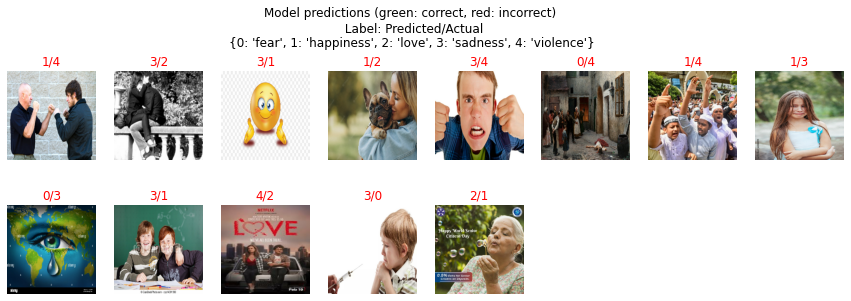

In [ ]:
#To predict only the WC images
#val_image_batch, val_label_batch = next(iter(val_data_gen))
#true_label_ids = np.argmax(val_label_batch, axis =-1)

import matplotlib.pyplot as plt
tf_model_predictions = model.predict(val_image_batch)
plt.figure(figsize=(15,9))
plt.subplots_adjust(hspace=0.5)
for n in range(len(Wrongly_classified)):
  plt.subplot(4,8,n+1)
  idx = Wrongly_classified[n]
  plt.imshow(val_image_batch[idx].numpy().astype("uint8"), cmap = 'Accent')
  color = "red"
  plt.title(str(np.argmax(tf_model_predictions[idx])) + "/" + str(true_label_ids[idx]), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect) \n Label: Predicted/Actual" "\n{0: 'fear', 1: 'happiness', 2: 'love', 3: 'sadness', 4: 'violence'}")


1/1 [==============================] - 0s 34ms/step


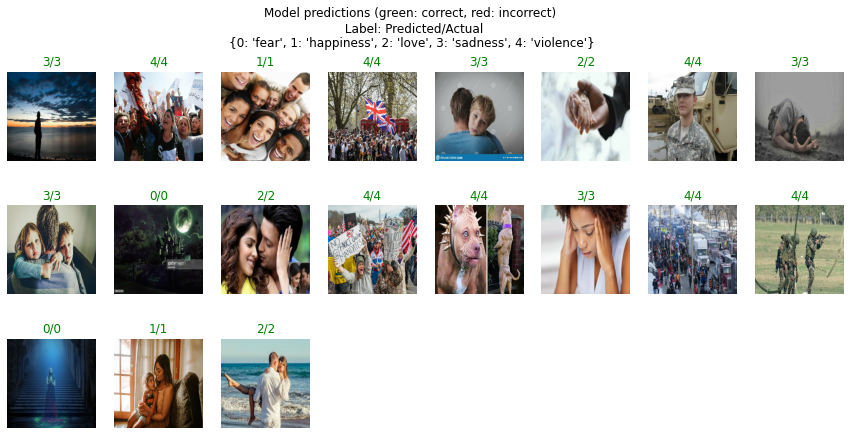

In [ ]:
#To predict only the cc images

import matplotlib.pyplot as plt
tf_model_predictions = model.predict(val_image_batch)
plt.figure(figsize=(15,9))
plt.subplots_adjust(hspace=0.5)
for n in range(len(Correctly_classified)):
  plt.subplot(4,8,n+1)
  idxx = Correctly_classified[n]
  plt.imshow(val_image_batch[idxx].numpy().astype("uint8"), cmap = 'Accent')
  color = "green"
  plt.title(str(np.argmax(tf_model_predictions[idxx])) + "/" + str(true_label_ids[idxx]), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect) \n Label: Predicted/Actual" "\n{0: 'fear', 1: 'happiness', 2: 'love', 3: 'sadness', 4: 'violence'}")


{0: 'fear', 1: 'happiness', 2: 'love', 3: 'sadness', 4: 'violence'}

In [ ]:
Test

In [ ]:
# Getting true labels

test_image_batch, test_label_batch = next(iter(test_data_gen))
print("Test img batch shape:", test_image_batch.shape)
print("Test label batch shape:", test_label_batch.shape)
print(test_label_batch[0])
true_label_ids = np.argmax(test_label_batch, axis =-1)
print(true_label_ids)
print(true_label_ids.shape)


Test img batch shape: (32, 256, 256, 3)
Test label batch shape: (32, 5)
tf.Tensor([1. 0. 0. 0. 0.], shape=(5,), dtype=float32)
[0 1 2 2 2 0 1 1 2 1 4 2 4 4 1 1 2 1 0 2 4 3 3 4 0 3 0 3 0 4 2 3]
(32,)


1/1 [==============================] - 1s 630ms/step


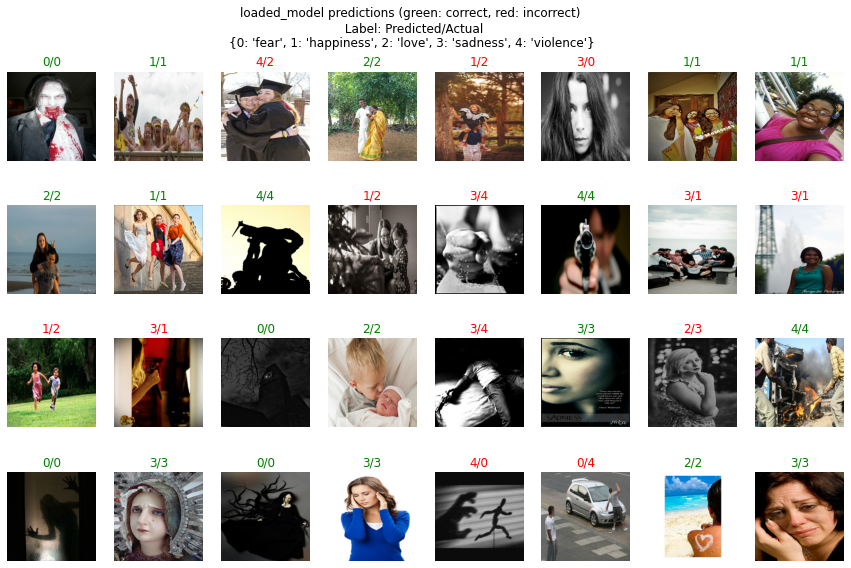

In [ ]:
#To predict both the wc and cc images

import matplotlib.pyplot as plt
tf_loaded_model_predictions = loaded_model.predict(test_image_batch)
plt.figure(figsize=(15,9))
plt.subplots_adjust(hspace=0.5)
for n in range(32):
  plt.subplot(4,8,n+1)
  plt.imshow(test_image_batch[n].numpy().astype("uint8"), cmap = 'Accent')
  if (np.argmax(tf_loaded_model_predictions[n]) == true_label_ids[n]):
    color = "green"
  else:
    color = "red"
  plt.title(str(np.argmax(tf_loaded_model_predictions[n])) + "/" + str(true_label_ids[n]), color=color)
  plt.axis('off')
_ = plt.suptitle("loaded_model predictions (green: correct, red: incorrect) \n Label: Predicted/Actual" "\n{0: 'fear', 1: 'happiness', 2: 'love', 3: 'sadness', 4: 'violence'}")


In [ ]:
#To create a list of Wc and cc images

Wrongly_classified = []
Correctly_classified = []

for n in range(32):
  if (np.argmax(tf_loaded_model_predictions[n]) != true_label_ids[n]):
    Wrongly_classified.append(n)
  else:
    Correctly_classified.append(n)
print(Wrongly_classified)
print(Correctly_classified)

[2, 4, 5, 11, 12, 14, 15, 16, 17, 20, 22, 28, 29]
[0, 1, 3, 6, 7, 8, 9, 10, 13, 18, 19, 21, 23, 24, 25, 26, 27, 30, 31]


1/1 [==============================] - 0s 34ms/step


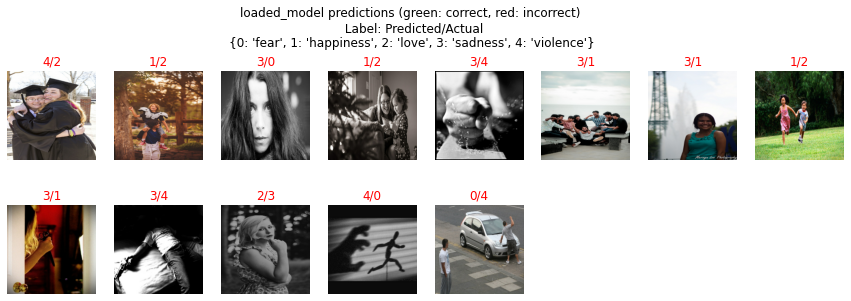

In [ ]:
#To predict only the WC images

import matplotlib.pyplot as plt
tf_loaded_model_predictions = loaded_model.predict(test_image_batch)
plt.figure(figsize=(15,9))
plt.subplots_adjust(hspace=0.5)
for n in range(len(Wrongly_classified)):
  plt.subplot(4,8,n+1)
  idx = Wrongly_classified[n]
  plt.imshow(test_image_batch[idx].numpy().astype("uint8"), cmap = 'Accent')
  color = "red"
  plt.title(str(np.argmax(tf_loaded_model_predictions[idx])) + "/" + str(true_label_ids[idx]), color=color)
  plt.axis('off')
_ = plt.suptitle("loaded_model predictions (green: correct, red: incorrect) \n Label: Predicted/Actual" "\n{0: 'fear', 1: 'happiness', 2: 'love', 3: 'sadness', 4: 'violence'}")


In [ ]:
loaded_model.predict("/content/love (16).jpg/")

IndexError: ignored

In [ ]:
sunflower_url = "/content/happiness (19).jpg"
#sunflower_path = tf.keras.utils.get_file('love', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_url, target_size=(IMG_SHAPE, IMG_SHAPE)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = loaded_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {}"
    .format(class_names[np.argmax(score)])
)